# Data Wrangling 

**This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.
The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.**

## Gather Data 

In [26]:
#import all libaries 
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import datetime as dt
import numpy as np


**Read csv file 'twitter-archive-enhanced.csv'**

In [27]:
# to read csv file 
# this describe The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets.
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Read tsv file 'image-predictions.tsv'**

In [28]:
# to read tsv file 
#a table full of image predictions (the top three only) alongside each tweet ID,image URL, and the image number 
#that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

df_image = pd.read_csv('image-predictions.tsv' , sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:

# Image Predictions File from a url online

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)


with open(url.split('/')[-1], mode = 'wb') as df_image1:
    df_image1.write(response.content)
    

**read data from API and TXT File 'tweet-json.txt'**

In [30]:
# this code we can extract data from API becaues don't have any response from twitter.
import tweepy

consumer_key = 'xxxxx'
consumer_secret = 'xxxx'
access_token = 'xxxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [31]:
#refeces from here: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
# here open json file and read line by line  and append each data in column and store in data frame called 'df_tweet'
tweet_list = []
with open('tweet-json.txt') as file_tweet:
    for x in file_tweet:
        tweet_data = json.loads(x)
        tweet_list.append({'tweet_id': tweet_data['id'],
                        'retweet_count': tweet_data['retweet_count'],
                        'favorite_count': tweet_data['favorite_count']})
df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [99]:

all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_tweet))
all_columns[all_columns.duplicated()]
# here to make merge between tables by tweet_id


17    tweet_id
29    tweet_id
dtype: object

## Assess

### Quality issues

 
- Erroneous datatypes for 'timestamp' and 'retweeted_status_timestamp' columns 
- A lot of missing values 
- rating_denominator can't be 0 becaues These ratings almost always have a denominator of 10
- Remove outliers from rating_numerator 
- Calculate the rate into column
- format source column <a href=><\a> 
- Erroneous datatypes in two columns 'retweet_count' and 'favorite_count'
- Rename 9 columns('p1', 'p2','p3','p1_conf', 'p2_conf','p3_conf', 'p1_dog', 'p2_dog','p3_dog')
- Extact short url from expanded_urls column


### Tidiness issues
- four column  (doggo	,floofer,	pupper	,puppo) in one column stage 
- Marge all 3 dataframe togather 
- 2 variables  in the same column



In [33]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [36]:
sum(df_archive.duplicated())
sum(df_archive['tweet_id'].duplicated())
sum(df_archive['name'].duplicated())#1399

1399

In [37]:
df_archive.isnull().values.any()

True

In [38]:
df_archive.isnull().values.sum() # 11140

11140

In [39]:
#here none name  745
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
             ... 
Venti           1
Aubie           1
Yukon           1
Chesterson      1
Jebberson       1
Name: name, Length: 957, dtype: int64

In [40]:
df_archive[['text', 'name']].sample(10)

,text,name
167,Meet Trooper. He picks pup recyclables that ha...,Trooper
182,RT @dog_rates: This is Luna. It's her first ti...,Luna
861,This is Belle. She's a Butterflop Hufflepoof. ...,Belle
1374,Meet Rilo. He's a Northern Curly Ticonderoga. ...,Rilo
2085,Meet Mason. He's a total frat boy. Pretends to...,Mason
1503,This is Kingsley Wellensworth III. He owns 7 r...,Kingsley
1988,"This is Ed. He's not mad, just disappointed. 1...",Ed
1380,"I'm not sure what's happening here, but it's p...",None
1030,This is Lenox. She's in a wheelbarrow. Silly d...,Lenox
897,This is Spencer. He's part of the Queen's Guar...,Spencer


In [41]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
sum(df_image.duplicated())
sum(df_image['tweet_id'].duplicated())

0

In [45]:
df_image.isnull().values.sum()

0

In [46]:
#df_image.p2.value_counts()

In [47]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [48]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [49]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [50]:
sum(df_tweet.duplicated())
sum(df_image['tweet_id'].duplicated())

0

In [51]:
df_tweet.isnull().values.sum()

0

## Clean

In [52]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

#### Define
**Marge all 3 dataframe togather**

Here marge 3 datafram 'df_archive'  'df_tweet' 'df_image' into one datafram Master_df 

#### code

In [53]:
#https://stackoverflow.com/questions/41984972/merge-three-dataframes-based-on-column-in-df1-pandas-dataframes 
df = df_archive.merge(df_image, on='tweet_id', how='left')
Master_df = df.merge(df_tweet, on='tweet_id', how='left')


In [54]:
sum(Master_df.duplicated())

0

In [55]:
Master_df.isnull().values.sum() #14235

14235

#### Test

In [56]:
Master_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


In [57]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define
**Erroneous datatypes for 'timestamp' and 'retweeted_status_timestamp' columns**

convert datatype for 'timestamp' and 'retweeted_status_timestamp' columns from object (str) to datetime by used function to_datetime                  

#### Code

In [58]:
#  here I  fix data by convert from object to datetime by function to_datetime from pandas Library
Master_df['timestamp'] = pd.to_datetime(Master_df['timestamp'])
Master_df['retweeted_status_timestamp'] = pd.to_datetime(Master_df['retweeted_status_timestamp'])

#### Test

In [59]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### define
**Incorrect value in rating_denominator** 

**Here  not all value was 10 and based on describe data the denominator 10. I 
replaced all value in the 'rating_denominator' column to number 10**

#### code 

In [60]:
Master_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [61]:
# here  not all value was 10 and based on describe data the denominator 10 
# so I replaced all value in the column to number 10 
Master_df.loc[(Master_df['rating_denominator'] != 10), 'rating_denominator'] = 10

#### Test 

In [62]:
Master_df.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### define
**Remove outliers and Calculate the rate** 

Here clean 'rating_numerator' column by removed 'outliers' all values > 20 
then calculated by devide 'rating_numerator' on 'rating_denominator' and stored into one column called 'Rating'. After that I droped both columns ('rating_numerator','rating_denominator') 

#### code 

In [63]:
Master_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [64]:
Master_df['rating_denominator']=Master_df['rating_denominator'].astype('int64')
Master_df['rating_numerator']=Master_df['rating_numerator'].astype('int64')

In [65]:
# here  not all value was 10 and based on describe data the denominator 10 
# so I replaced all value in the column to number 10 
Master_df.loc[(Master_df['rating_denominator'] != 10), 'rating_denominator'] = 10
Master_df.rating_denominator.value_counts()
                           

10    2356
Name: rating_denominator, dtype: int64

In [66]:
Master_df =Master_df.query('rating_numerator <= 20 ')

In [67]:
#Master_df.head()
Master_df.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
0       2
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

In [68]:
#caluected rate and into one column called 'Rating'

Master_df['Rating'] = 10*(Master_df['rating_numerator'] / 
                                 Master_df['rating_denominator']) 

In [69]:
Master_df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### test 

In [70]:
#Master_df.info()
Master_df.head(40)
Master_df.Rating.value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
9.0     158
8.0     102
7.0      55
14.0     54
5.0      37
6.0      32
3.0      19
4.0      17
2.0       9
1.0       9
0.0       2
15.0      2
17.0      1
20.0      1
Name: Rating, dtype: int64

#### define
**format source column <a href=><\a>**

Source link it have html script code in value. so, replace the value in source column to just  value between tag a.Here have four from "Twitter for iPhone" and "Vine - Make a Scene" , "Twitter Web Client", "TweetDeck"

#### code

In [71]:
Master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [72]:
#https://www.w3schools.com/python/ref_string_replace.asp
Master_df['source'] = Master_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
Master_df['source'] = Master_df['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
Master_df['source'] = Master_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
Master_df['source'] = Master_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


#### Test 

In [73]:
Master_df.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

#### Define
**2 variables  in the same column** 


I Separated to two column Date and Time by using packge 

#### Code

In [3]:

Master_df['Date'] = Master_df['timestamp'].dt.date
Master_df['Time'] = Master_df['timestamp'].dt.time

#Master_df['Date'] = Master_df.timestamp.strftime("%d-%m-%Y") 
#Master_df['Time'] = Master_df.timestamp.strftime('%H.%M.%S')
# Note: axis=1 denotes that we are referring to a column, not a row
Master_df.drop(['timestamp'], axis=1, inplace=True)


NameError: name 'Master_df' is not defined

#### Test  

In [75]:
Master_df.info()
Master_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2332 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   source                      2332 non-null   object             
 4   text                        2332 non-null   object             
 5   retweeted_status_id         180 non-null    float64            
 6   retweeted_status_user_id    180 non-null    float64            
 7   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 8   expanded_urls               2277 non-null   object             
 9   name                        2332 non-null   object             
 10  doggo                       2332 non-null   object          

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Rating,Date,Time
0,892420643555336193,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,Phineas,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,13.0,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,Tilly,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,13.0,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,Archie,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,12.0,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,Darla,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,13.0,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,12.0,2017-07-29,16:00:24


#### define
**Missing value**

A lot of Missing value in the 4 column 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id' ,'retweeted_status_user_id', 'retweeted_status_timestamp'  and this columns it  cause confusion in data analysis and are not useful information for analysis so, dropped.

#### code

In [76]:

Master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id' ,'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace=True)


In [77]:
Master_df.dropna(inplace=True)

#### test

In [78]:
Master_df.head()
#Master_df.isnull().values.sum()

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Rating,Date,Time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,13.0,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,13.0,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,12.0,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,13.0,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,12.0,2017-07-29,16:00:24


In [79]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2054 non-null   int64  
 1   source          2054 non-null   object 
 2   text            2054 non-null   object 
 3   expanded_urls   2054 non-null   object 
 4   name            2054 non-null   object 
 5   doggo           2054 non-null   object 
 6   floofer         2054 non-null   object 
 7   pupper          2054 non-null   object 
 8   puppo           2054 non-null   object 
 9   jpg_url         2054 non-null   object 
 10  img_num         2054 non-null   float64
 11  p1              2054 non-null   object 
 12  p1_conf         2054 non-null   float64
 13  p1_dog          2054 non-null   object 
 14  p2              2054 non-null   object 
 15  p2_conf         2054 non-null   float64
 16  p2_dog          2054 non-null   object 
 17  p3              2054 non-null   o

In [80]:
Master_df.name.value_counts()

None       565
a           54
Charlie     11
Lucy        10
Penny       10
          ... 
Reptar       1
Stefan       1
Traviss      1
Brat         1
Blu          1
Name: name, Length: 933, dtype: int64

#### Define
**Erroneous datatypes in two columns 'retweet_count' and 'favorite_count'** 


it must discrete variable to int 

#### Code 

In [81]:
Master_df['retweet_count']=Master_df['retweet_count'].astype('int')
Master_df['favorite_count']=Master_df['favorite_count'].astype('int')

#### Test 

In [82]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2054 non-null   int64  
 1   source          2054 non-null   object 
 2   text            2054 non-null   object 
 3   expanded_urls   2054 non-null   object 
 4   name            2054 non-null   object 
 5   doggo           2054 non-null   object 
 6   floofer         2054 non-null   object 
 7   pupper          2054 non-null   object 
 8   puppo           2054 non-null   object 
 9   jpg_url         2054 non-null   object 
 10  img_num         2054 non-null   float64
 11  p1              2054 non-null   object 
 12  p1_conf         2054 non-null   float64
 13  p1_dog          2054 non-null   object 
 14  p2              2054 non-null   object 
 15  p2_conf         2054 non-null   float64
 16  p2_dog          2054 non-null   object 
 17  p3              2054 non-null   o

#### Define
**Rename 9 columns('p1', 'p2','p3','p1_conf', 'p2_conf','p3_conf', 'p1_dog', 'p2_dog','p3_dog')**

Change name columns to more clear descriptive name. Change p1 to Prediction_1 and  p2 to Prediction_2, Change p3 to Prediction_3. Depending on this change
will change other columns that is related to the prediction

#### Code 

In [83]:
Master_df.rename(columns={'p1': 'Prediction_1', 'p2': 'Prediction_2', 'p3': 'Prediction_3'}, inplace=True)

In [84]:
Master_df.rename(columns={'p1_conf': 'Prediction_1_conf', 'p1_dog': 'Prediction_1_dog','p2_conf': 'Prediction_2_conf', 'p2_dog': 'Prediction_2_dog','p3_conf': 'Prediction_3_conf', 'p3_dog': 'Prediction_3_dog'}, inplace=True)

#### Test 

In [85]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2054 non-null   int64  
 1   source             2054 non-null   object 
 2   text               2054 non-null   object 
 3   expanded_urls      2054 non-null   object 
 4   name               2054 non-null   object 
 5   doggo              2054 non-null   object 
 6   floofer            2054 non-null   object 
 7   pupper             2054 non-null   object 
 8   puppo              2054 non-null   object 
 9   jpg_url            2054 non-null   object 
 10  img_num            2054 non-null   float64
 11  Prediction_1       2054 non-null   object 
 12  Prediction_1_conf  2054 non-null   float64
 13  Prediction_1_dog   2054 non-null   object 
 14  Prediction_2       2054 non-null   object 
 15  Prediction_2_conf  2054 non-null   float64
 16  Prediction_2_dog   2054 

#### Define
**Extact short url from expanded_urls column**

by using split method with text column to extact short url from  in last expanded_urls column then stored in short_link column and droped the expanded_urls.

In [86]:
Master_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667924896115245057/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/680191257256136705/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                    

#### Code 

In [87]:
Master_df['short_link'] = Master_df['text'].apply(lambda x :x.strip().split(' ')[-1])
Master_df.drop('expanded_urls', axis =1, inplace=True)
Master_df['text'] =Master_df['text'].apply(lambda x:x.split('https:')[0])

#### Test 

In [88]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2054 non-null   int64  
 1   source             2054 non-null   object 
 2   text               2054 non-null   object 
 3   name               2054 non-null   object 
 4   doggo              2054 non-null   object 
 5   floofer            2054 non-null   object 
 6   pupper             2054 non-null   object 
 7   puppo              2054 non-null   object 
 8   jpg_url            2054 non-null   object 
 9   img_num            2054 non-null   float64
 10  Prediction_1       2054 non-null   object 
 11  Prediction_1_conf  2054 non-null   float64
 12  Prediction_1_dog   2054 non-null   object 
 13  Prediction_2       2054 non-null   object 
 14  Prediction_2_conf  2054 non-null   float64
 15  Prediction_2_dog   2054 non-null   object 
 16  Prediction_3       2054 

#### Define
**10- Four columns ('doggo' ,'floofer', 'pupper', 'puppo') in dataset into one column  called: 'stage' 
to make this dataset enhanced**


#### Code 

In [89]:
# here to solve None by repleced to space
Master_df['doggo'].replace('None', '',inplace=True)
Master_df['floofer'].replace('None', '',inplace=True)
Master_df['pupper'].replace('None', '',inplace=True)
Master_df['puppo'].replace('None', '',inplace=True)


In [90]:
# merge  4 columns into one column 'dog_stage'
Master_df['dog_stage']= Master_df['doggo']+ Master_df['floofer']+Master_df['pupper']+Master_df['puppo']
Master_df.dog_stage.value_counts()

                1735
pupper           209
doggo             67
puppo             23
doggopupper       11
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [91]:
# here to solve problem many dogs have more than one stage som solved by pass on column and replaced  
Master_df.loc[Master_df['dog_stage']== 'doggofloofer','dog_stage']= 'doggo,floofer'
Master_df.loc[Master_df['dog_stage']== 'doggopupper','dog_stage']= 'doggo,pupper'
Master_df.loc[Master_df['dog_stage']== 'doggopuppo','dog_stage']= 'doggo,puppo'
#missing values 
Master_df.loc[Master_df['dog_stage']== '','dog_stage']= np.nan

# Delete column 'doggo','floofer','pupper','puppo'
Master_df.drop(['doggo', 'floofer','pupper' ,'puppo'], axis=1, inplace=True)


In [92]:
Master_df.dog_stage.value_counts()

pupper           209
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Test 

In [93]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2054 non-null   int64  
 1   source             2054 non-null   object 
 2   text               2054 non-null   object 
 3   name               2054 non-null   object 
 4   jpg_url            2054 non-null   object 
 5   img_num            2054 non-null   float64
 6   Prediction_1       2054 non-null   object 
 7   Prediction_1_conf  2054 non-null   float64
 8   Prediction_1_dog   2054 non-null   object 
 9   Prediction_2       2054 non-null   object 
 10  Prediction_2_conf  2054 non-null   float64
 11  Prediction_2_dog   2054 non-null   object 
 12  Prediction_3       2054 non-null   object 
 13  Prediction_3_conf  2054 non-null   float64
 14  Prediction_3_dog   2054 non-null   object 
 15  retweet_count      2054 non-null   int32  
 16  favorite_count     2054 

# Visualizations Data

From this diagram we knew a large percentage of tweets from iphone 

Text(0, 0.5, 'Number of tweete')

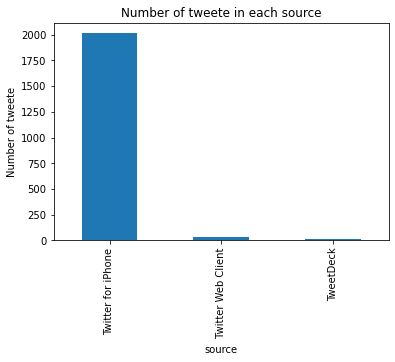

In [94]:
source1= Master_df['source'].value_counts().plot.bar()
source1.set_xticklabels(['Twitter for iPhone',' Twitter Web Client', 'TweetDeck'])
plt.title('Number of tweete in each source')
plt.xlabel('source')
plt.ylabel('Number of tweete')


The scatter charts  illustrates relationship  between Favorite_count and Retweet_count  and are correlated pretty strongly.

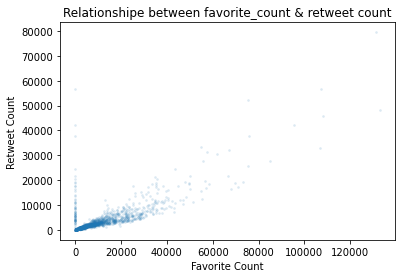

In [95]:
# scatterplot
#Favorite_count and Retweet_count are correlated pretty strongly. 

Master_df.plot.scatter(x='favorite_count', y='retweet_count',alpha=0.1, s=3)
plt.title('Relationshipe between favorite_count & retweet count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

plt.show()

In [96]:
Master_df.favorite_count.value_counts()

0        79
2176      3
2706      3
610       3
2918      3
         ..
2638      1
593       1
16983     1
23134     1
4077      1
Name: favorite_count, Length: 1835, dtype: int64

Text(0, 0.5, 'Rate ')

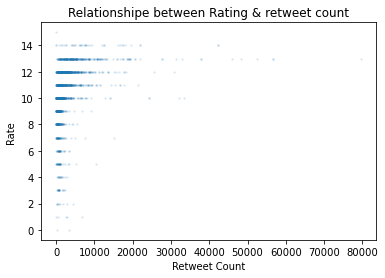

In [97]:
#There is not a clear relationship between the  ratings and the retweets.
Master_df.plot.scatter('retweet_count', 'Rating',alpha=0.1, s=2)
plt.title('Relationshipe between Rating & retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Rate ')

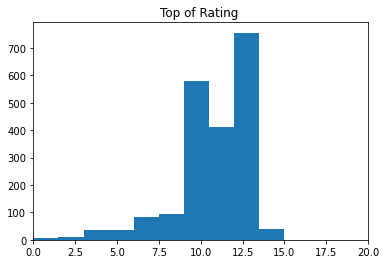

12.0    473
10.0    429
11.0    413
13.0    283
9.0     151
8.0      95
7.0      52
14.0     40
5.0      34
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
0.0       2
15.0      1
Name: Rating, dtype: int64

In [98]:
plt.title('Top of Rating ')
plt.hist(x = Master_df.Rating)
plt.xlim(0,20)
plt.show()
Master_df.Rating.value_counts()